# <center><b>Customer Transaction Prediction<b></center>

---
<a name = Section1></a>
# **Step 1. Introduction**
---
- **Customer Transaction Prediction**

This project aims to predict whether a customer will make a transaction based on various features. We will use a dataset containing customer transaction data and apply different machine learning models to predict the target variable.

This workflow includes an introduction, problem statement, exploratory data analysis (EDA), and the steps for data preprocessing, model training, comparison, and evaluation.

- **Defination:**
Customer Transaction Prediction:

This project involves predicting whether a customer will make a transaction based on various features.
It uses machine learning models to analyze customer data and predict the likelihood of a transaction.

- **Purpose of the Project:**

To build a predictive model that can accurately classify whether a customer will make a transaction (target = 1) or not (target = 0).

To leverage historical customer data to identify patterns and trends that influence transaction behavior.

To improve decision-making processes in marketing, sales, and customer relationship management by predicting customer actions.

- **Use Case:**

*Retail Industry:* Predicting which customers are likely to make a purchase, enabling targeted marketing campaigns and personalized offers.

*Banking and Finance:* Identifying customers who are likely to engage in financial transactions, helping in fraud detection and customer retention strategies.

*E-commerce:* Enhancing customer experience by predicting purchase behavior and recommending relevant products.

*Subscription Services:* Forecasting which users are likely to renew their subscriptions, allowing for proactive engagement and retention efforts.


# **Step 2. Problem Statement**
---
- The goal is to build a predictive model that can accurately classify whether a customer will make a transaction (`target` = 1) or not (`target` = 0) based on the given features in the dataset.

An e-commerce company has accumulated historical data on how its clients have interacted with its services. The company aims to predict the likelihood of customers making a transaction so it can optimize its marketing strategies and improve customer retention. The steps involved in this project include:

**1.Perform Exploratory Data Analysis (EDA):**

Analyze the dataset to understand the distribution of transactions and identify patterns.
Create visualizations to depict the distribution of the target variable (transaction vs. no transaction).
Examine the relationships between different features and the target variable.

**2.Identify and Apply the Best Machine Learning Model:**

Train multiple machine learning models on the dataset.
Evaluate the performance of each model using appropriate metrics (e.g., ROC-AUC score).
Select the best-performing model based on the evaluation results.

**3.Predict Customer Transactions:**

Use the selected model to predict whether a particular customer will make a transaction.
Consider customer demographics, service usage patterns, and other relevant features in the prediction.

**Example Use Case**
Scenario: An e-commerce company wants to predict the likelihood of customers making a transaction based on their historical interaction data. The company plans to use this information to launch targeted marketing campaigns and improve customer engagement.

**Steps:**

    Data Collection: Gather historical data on customer interactions, including demographics, browsing behavior, purchase history, and any complaints or feedback.
    EDA and Visualization: Perform EDA to understand the data distribution and create charts to visualize the transaction patterns.
    Model Training: Train various machine learning models (e.g., Logistic Regression, Random Forest, K-Nearest Neighbors) on the dataset.
    Model Evaluation: Evaluate the models using cross-validation and select the best model based on the ROC-AUC score.
    Prediction: Use the best model to predict the likelihood of transactions for new customers based on their demographics and interaction patterns.

**Outcome:** By accurately predicting customer transactions, the company can:

    Launch targeted marketing campaigns to encourage transactions.
    Personalize offers and recommendations to increase customer satisfaction.
    Improve customer retention by identifying and addressing potential issues early.
    This problem statement outlines a clear and structured approach to predicting customer transactions, highlighting the importance of EDA, model selection, and practical applications in an e-commerce context. 

---
<a name = Section3></a>
# **Step 3. Importing Libraries**
---
- Importing all the necessary libraries.
Purpose: Importing necessary libraries is the first step to ensure you have all the tools required for data manipulation, visualization, and machine learning.

pandas: For data manipulation and analysis.

numpy: For numerical operations.

seaborn and matplotlib: For data visualization.

sklearn: For machine learning algorithms and evaluation metrics.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

---
<a name = Section4></a>
# **Step 4: Load Data
--
- Load your dataset using pandas.
Purpose: Load the dataset into a pandas DataFrame to make it easier to work with.

pandas.read_csv(): Reads the CSV file and loads it into a DataFrame.

In [3]:
data = pd.read_csv('C:/Users/samyukthaelanchezhia/Downloads/PRCP-1003-CustTransPred.zip')

---
<a name = Section5></a>
# **Step 5: Initial Data Exploration
--
- Explore your data to understand its structure and contents.
- Purpose: Understand the structure and contents of the dataset.

data.head(): Displays the first few rows of the dataset.

data.tail(): Displays the last few rows of the dataset.

data.describe(): Provides summary statistics for numerical columns.

data.info(): Displays information about data types and non-null values.

data.dtypes.value_counts(): Counts the different data types in the dataset.

data.notnull().sum(): Counts the non-null values in each column.

In [4]:
print(data.head())

   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0

In [5]:
print(data.tail())

             ID_code  target    var_0   var_1    var_2   var_3    var_4  \
199995  train_199995       0  11.4880 -0.4956   8.2622  3.5142  10.3404   
199996  train_199996       0   4.9149 -2.4484  16.7052  6.6345   8.3096   
199997  train_199997       0  11.2232 -5.0518  10.5127  5.6456   9.3410   
199998  train_199998       0   9.7148 -8.6098  13.6104  5.7930  12.5173   
199999  train_199999       0  10.8762 -5.7105  12.1183  8.0328  11.5577   

          var_5   var_6    var_7  ...  var_190  var_191  var_192  var_193  \
199995  11.6081  5.6709  15.1516  ...   6.1415  13.2305   3.9901   0.9388   
199996 -10.5628  5.8802  21.5940  ...   4.9611   4.6549   0.6998   1.8341   
199997  -5.4086  4.5555  21.5571  ...   4.0651   5.4414   3.1032   4.8793   
199998   0.5339  6.0479  17.0152  ...   2.6840   8.6587   2.7337  11.1178   
199999   0.3488  5.2839  15.2058  ...   8.9842   1.6893   0.1276   0.3766   

        var_194  var_195  var_196  var_197  var_198  var_199  
199995  18.0249  -1.793

In [6]:
print(data.describe())

              target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.8831

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
None


In [8]:
print(data.dtypes.value_counts())

float64    200
object       1
int64        1
Name: count, dtype: int64


In [9]:
print(data.notnull().sum())

ID_code    200000
target     200000
var_0      200000
var_1      200000
var_2      200000
            ...  
var_195    200000
var_196    200000
var_197    200000
var_198    200000
var_199    200000
Length: 202, dtype: int64


---
<a name = Section6></a>
# **Step 6: Check for Missing Values
--
- Identify and display columns with missing values.

- Purpose: Identify columns with missing values and understand the extent of missing data.

data.isnull().sum(): Counts the number of missing values in each column.

null_counts[null_counts > 0]: Filters columns that have missing values.

data.isnull().sum().sum(): Calculates the total number of missing values in the dataset.

In [10]:
null_counts = data.isnull().sum()
null_columns = null_counts[null_counts > 0]
print(null_columns)
print(data.isnull().sum().sum())

Series([], dtype: int64)
0


---
<a name = Section7></a>
# **Step 7: Exploratory Data Analysis (EDA) - Visualize Data
--
- Create various plots to visualize the data.
- Purpose: Gain insights into the data distribution and relationships between variables.

data['target'].value_counts().plot.bar(): Plots the distribution of the target variable.

data.boxplot(): Creates boxplots for selected variables against the target variable.

data.hist(): Plots histograms for all variables to understand their distributions.

plt.matshow(data.corr()): Displays the correlation matrix to understand relationships between variables.

sns.pairplot(): Creates pair plots for a random sample of columns to visualize relationships.

sns.scatterplot(): Plots scatter plots for selected variables to visualize their relationship with the target.

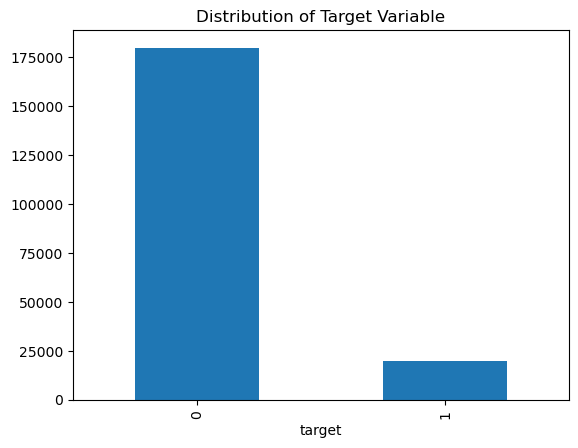

C:\Users\ajayr\AppData\Local\Temp\ipykernel_13288\2278138403.py:8: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  data.boxplot(["var_8", "var_32", "var_56", "var_80", "var_104", "var_128", "var_152", "var_199"], by="target", grid=False, ax=ax)


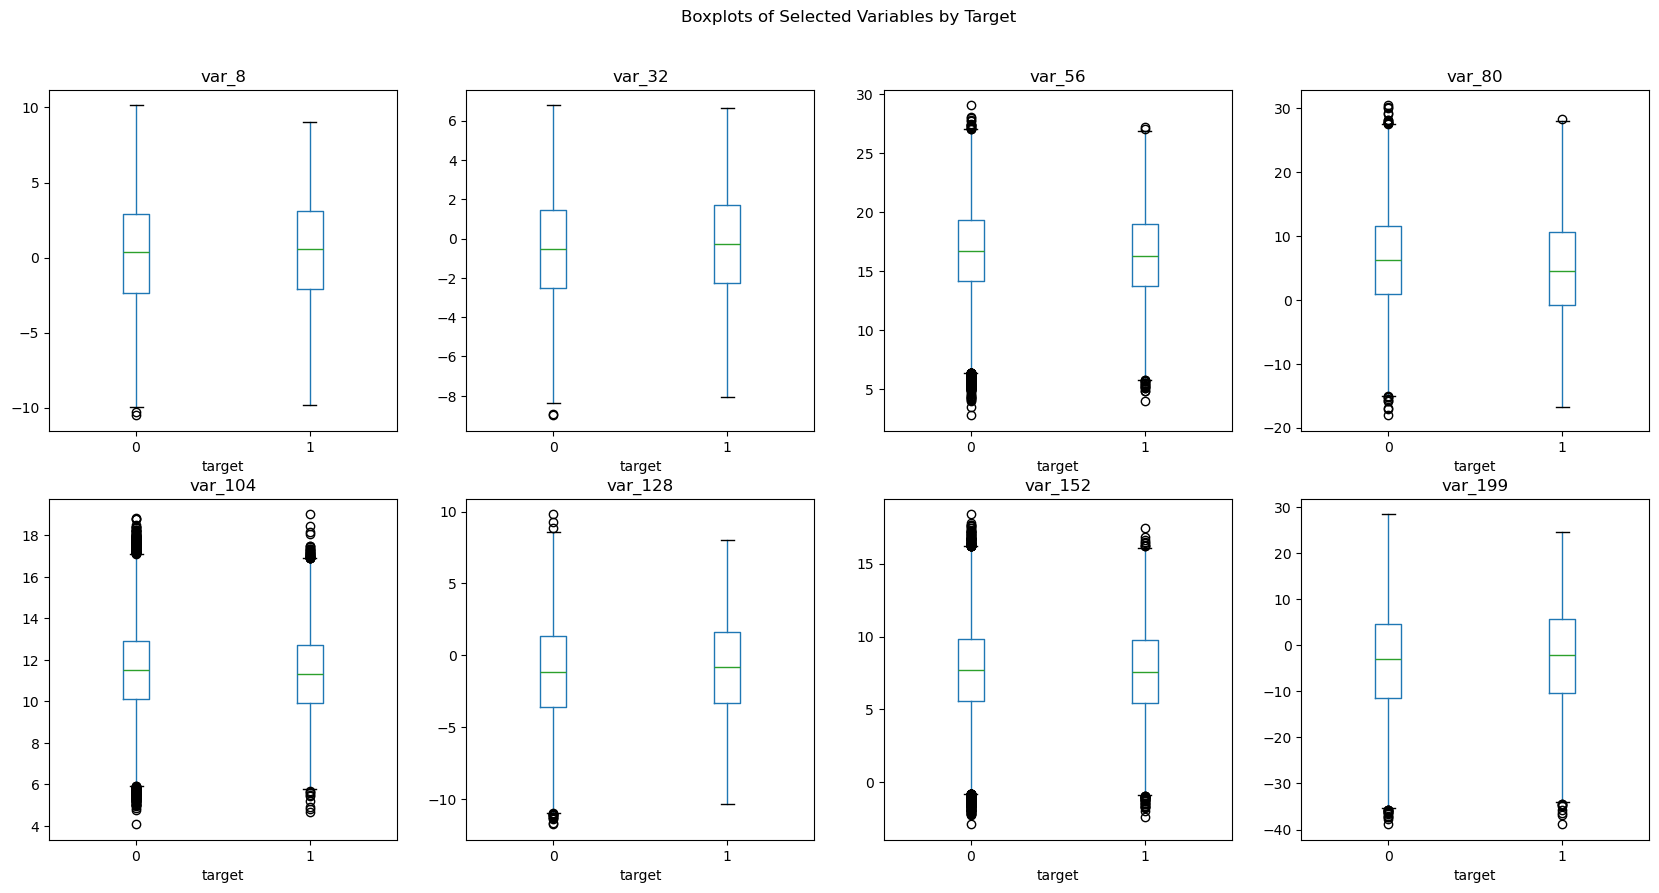

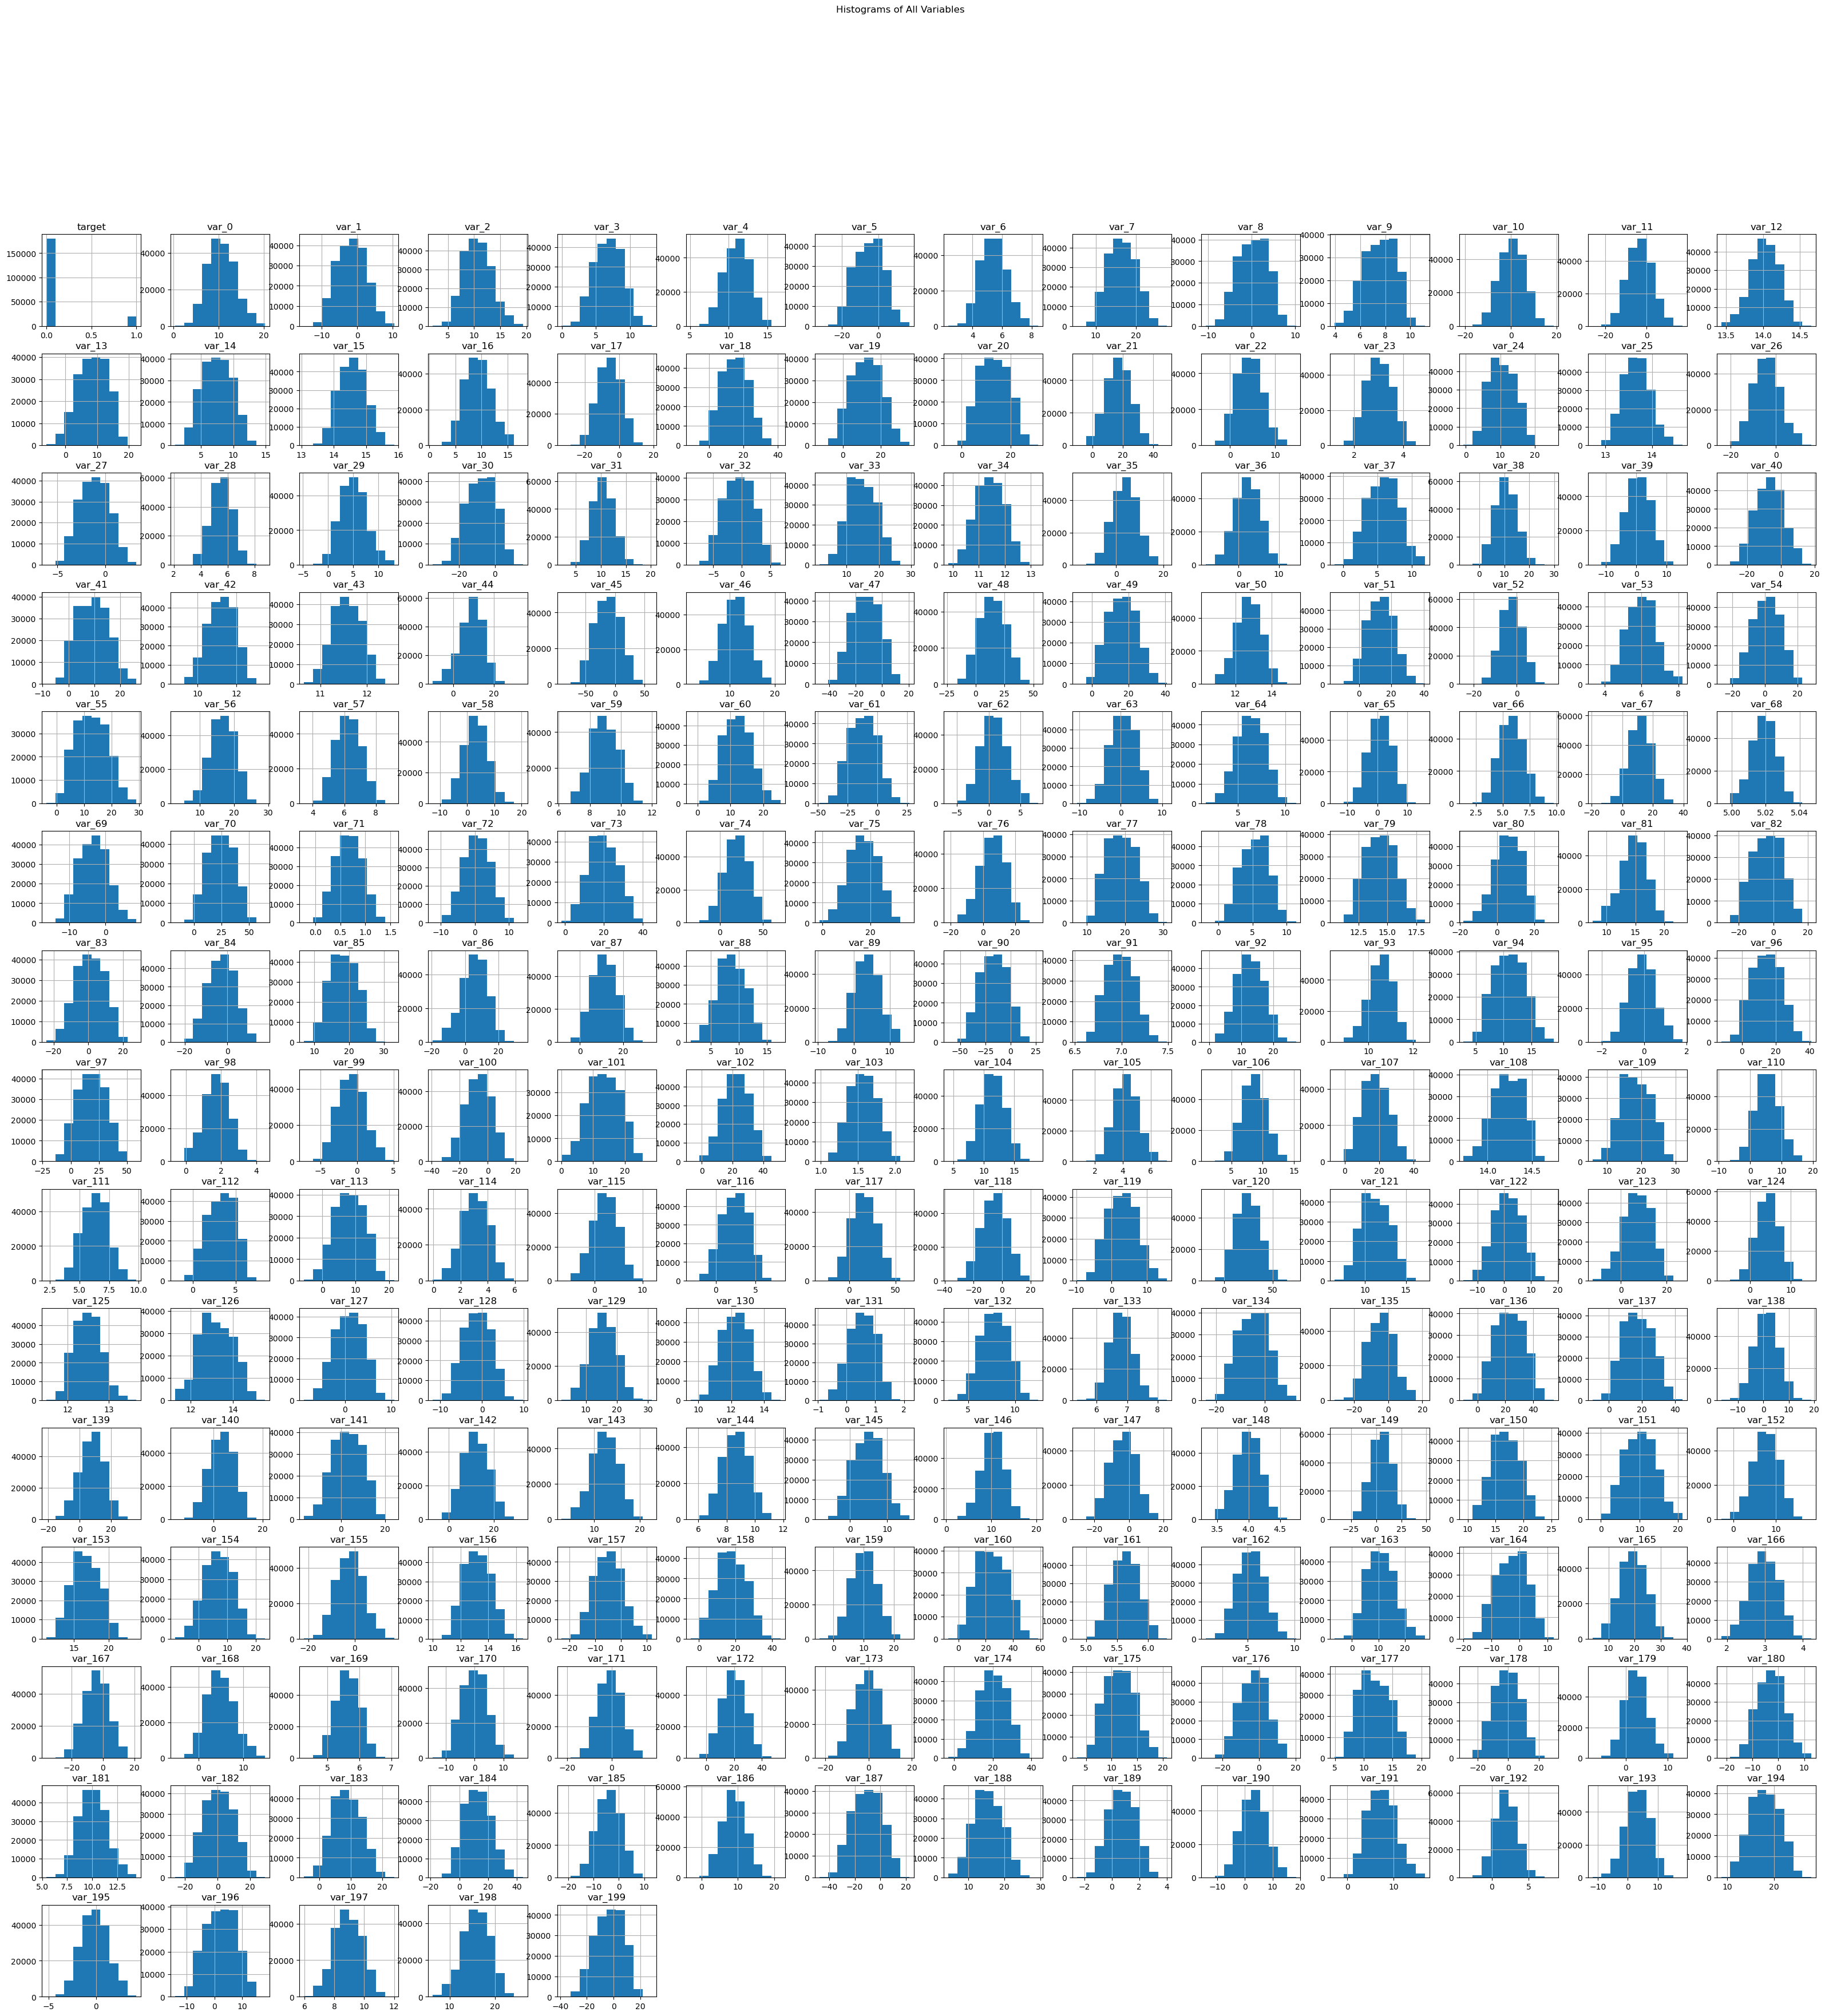

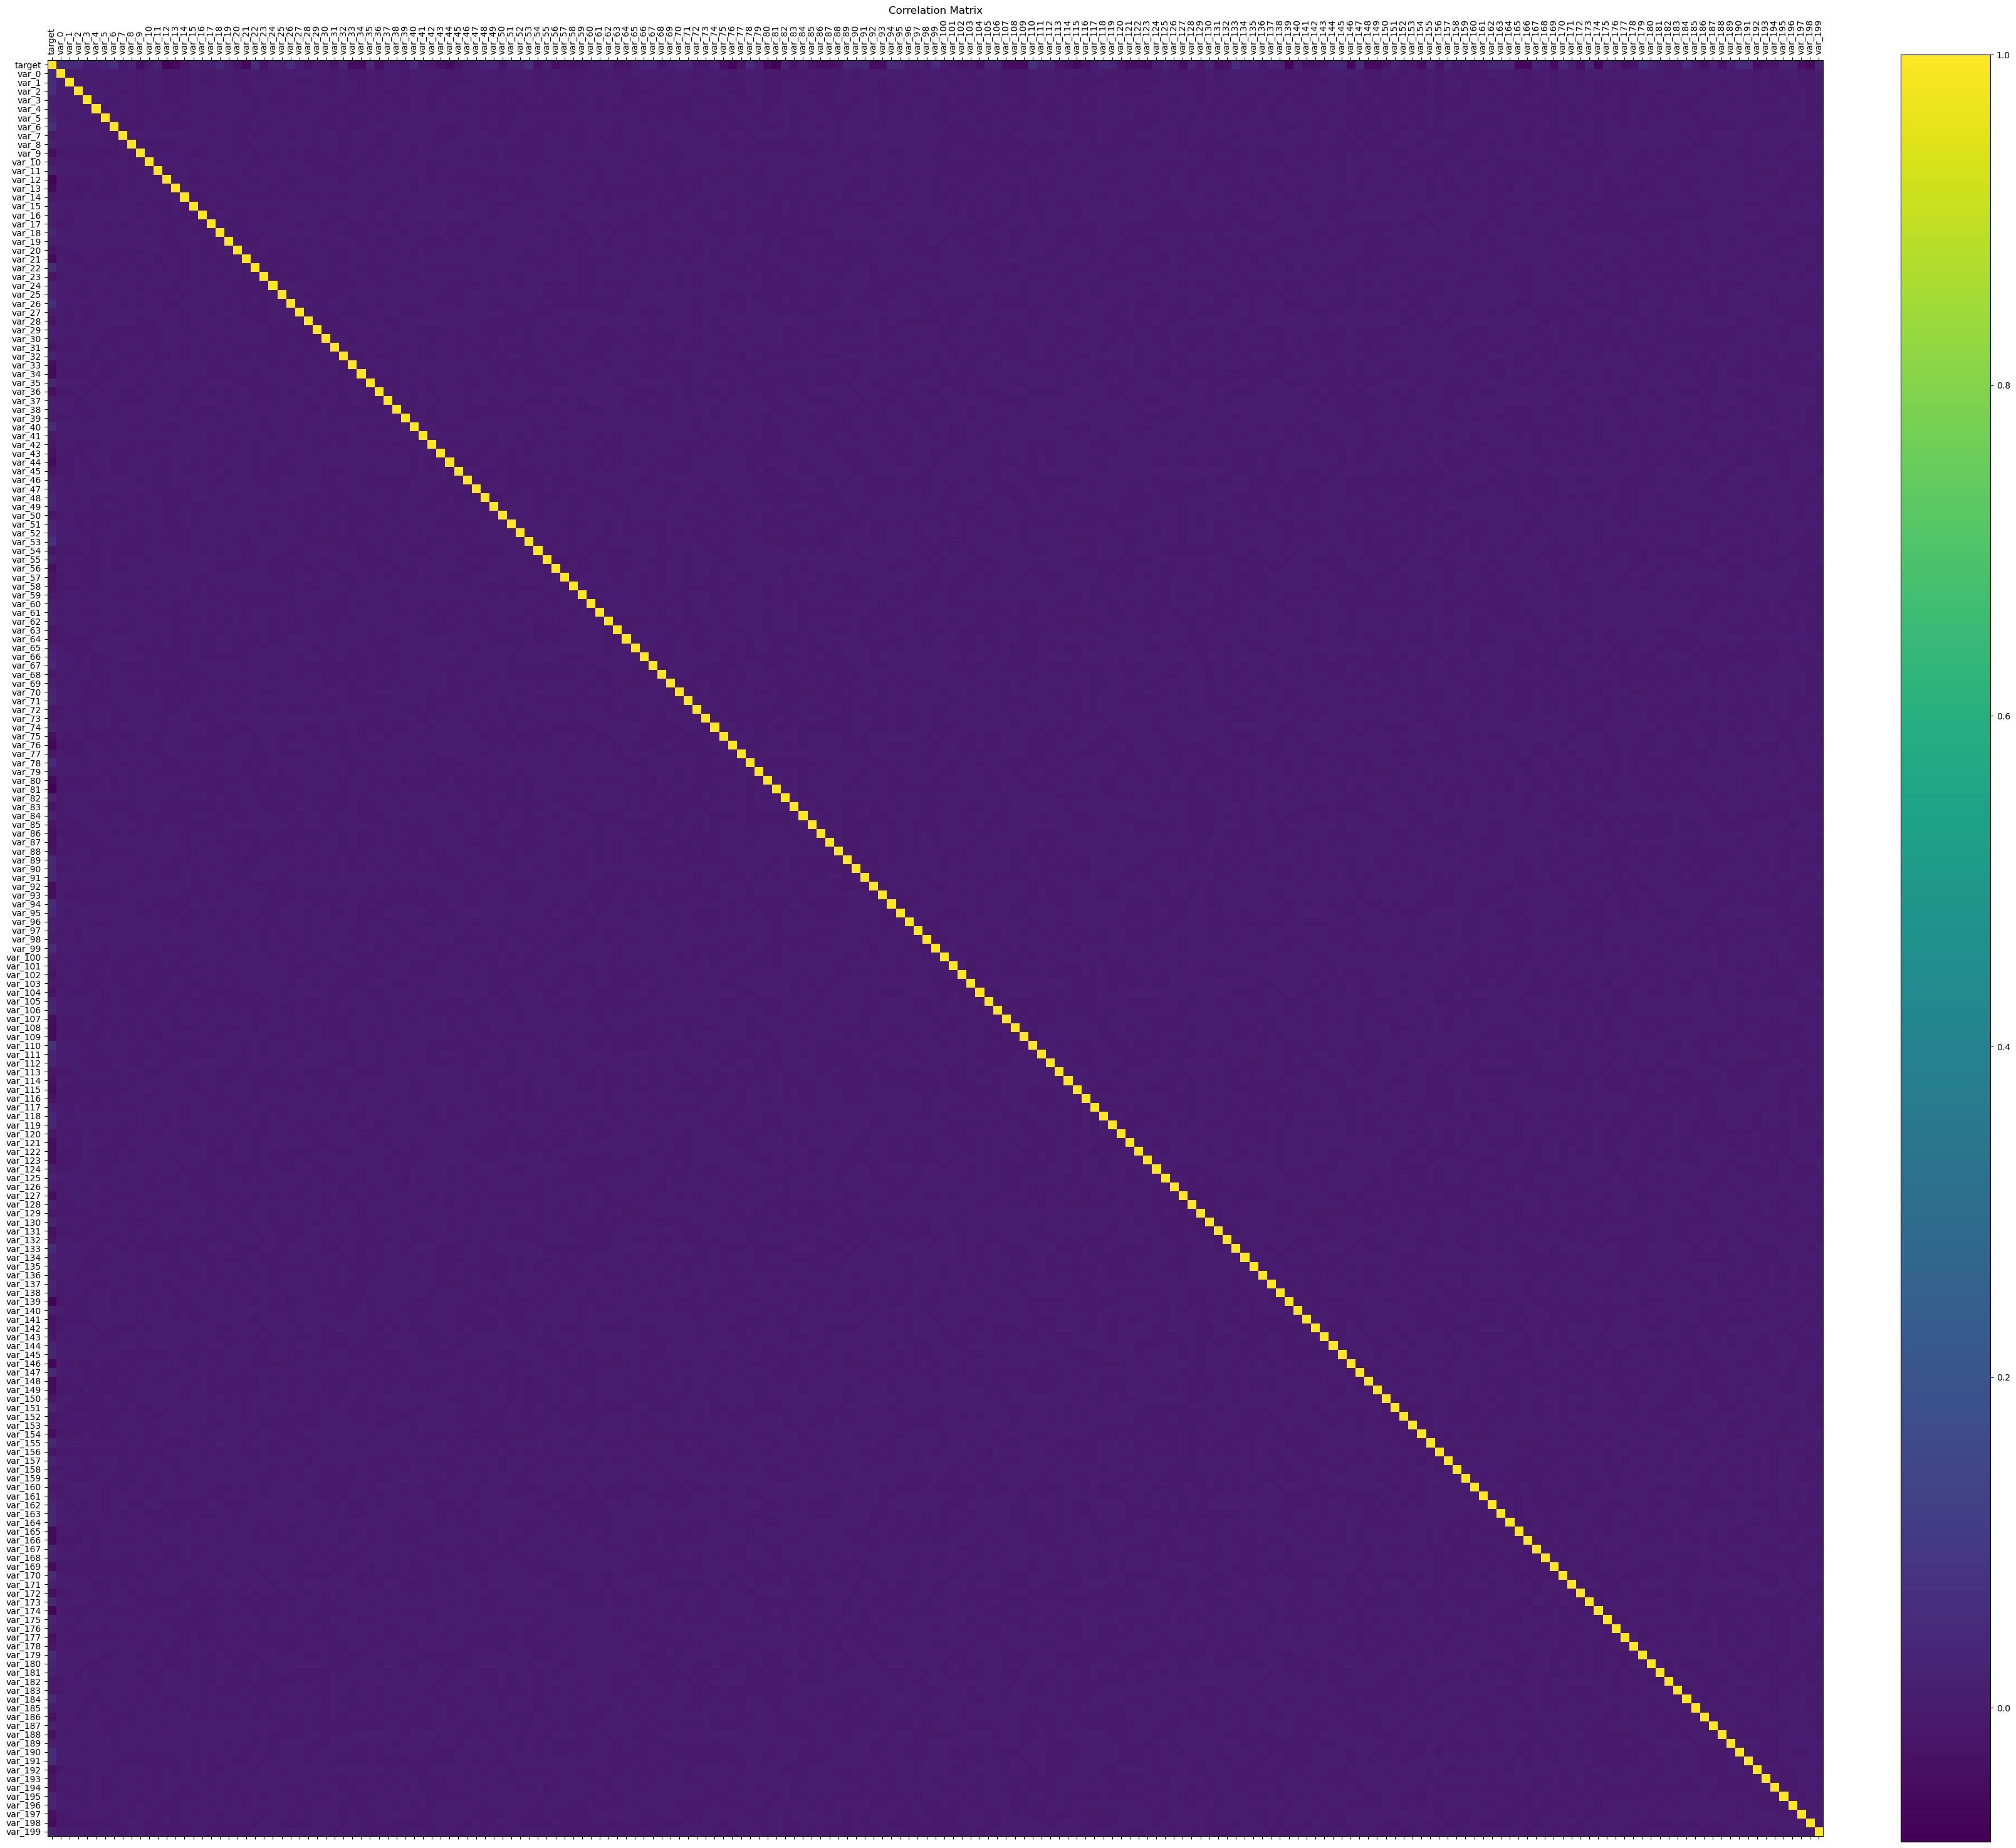

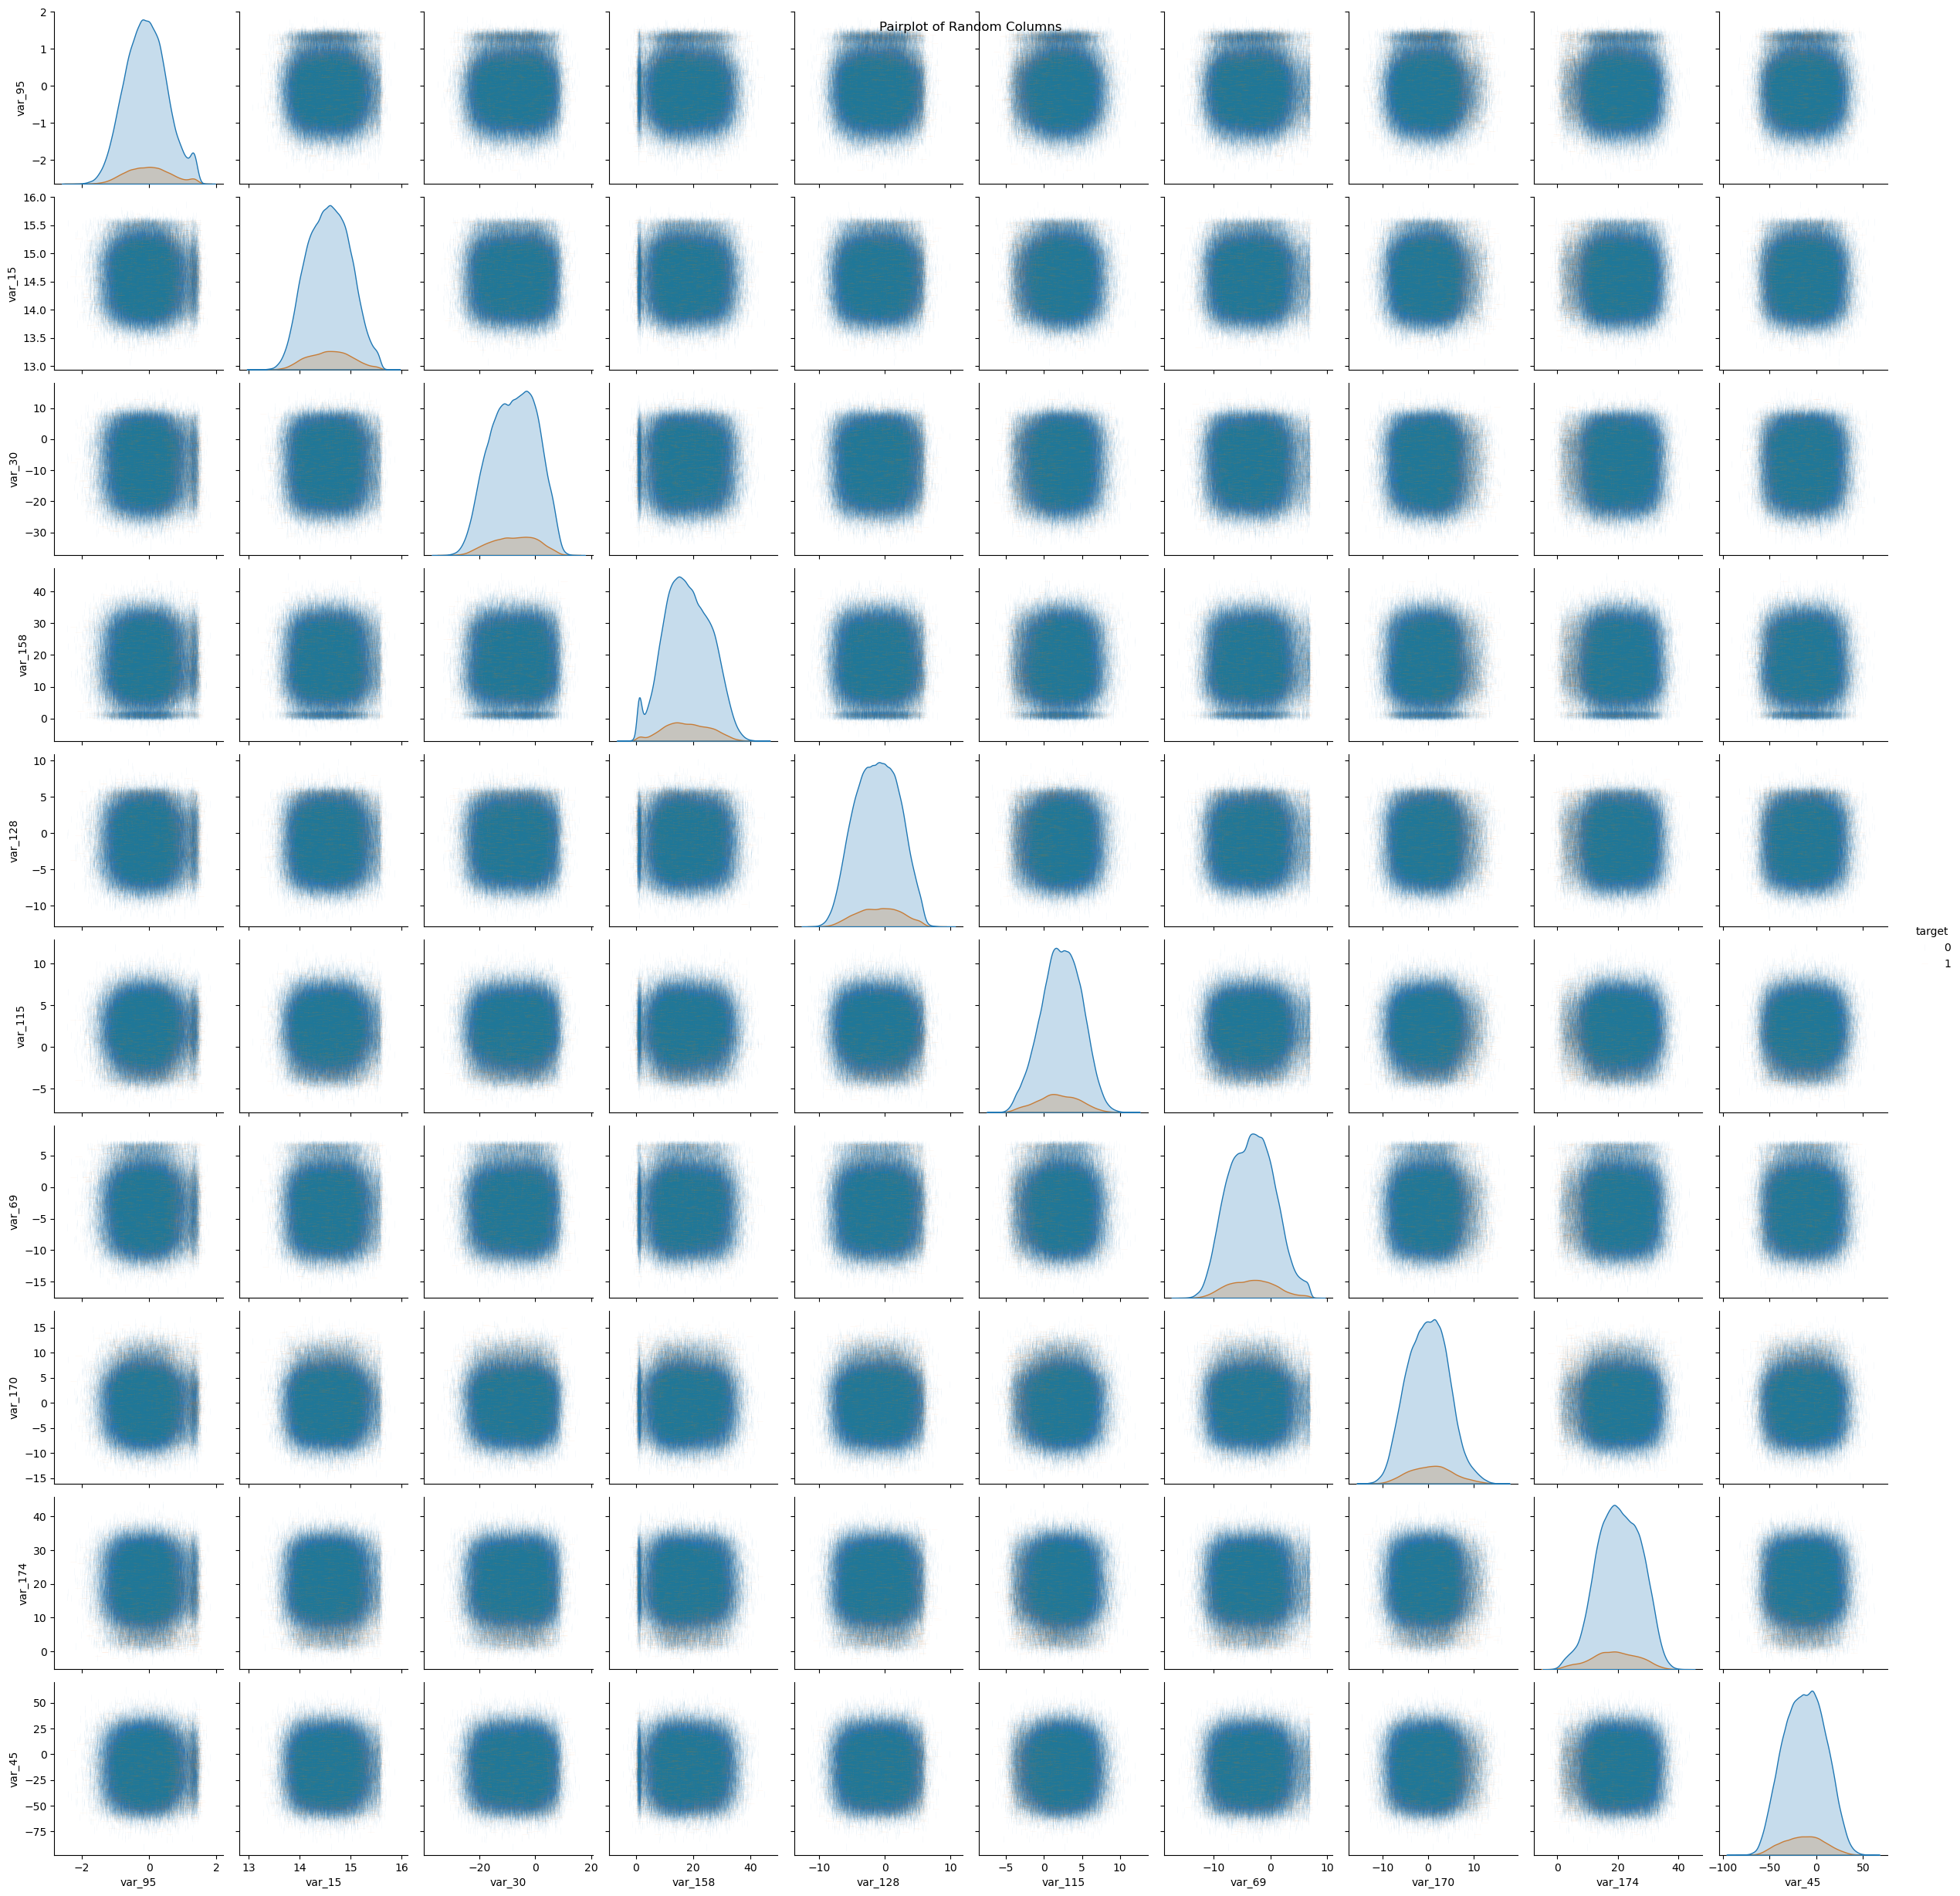

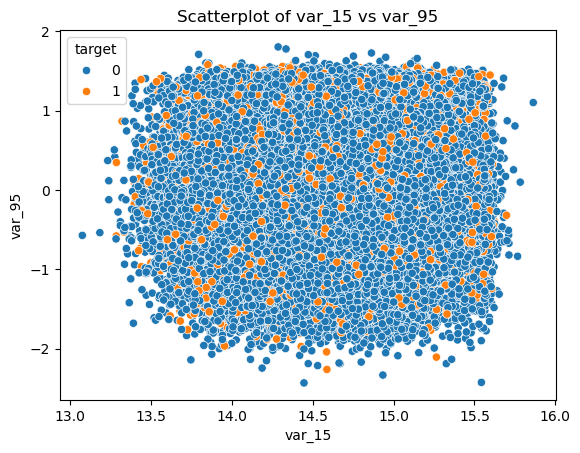

In [11]:
# Distribution of target variable
data['target'].value_counts().plot.bar()
plt.title('Distribution of Target Variable')
plt.show()

# Boxplots of selected variables against the target
fig, ax = plt.subplots(2, 4, figsize=(20, 10), sharey=False)
data.boxplot(["var_8", "var_32", "var_56", "var_80", "var_104", "var_128", "var_152", "var_199"], by="target", grid=False, ax=ax)
plt.suptitle('Boxplots of Selected Variables by Target')
plt.show()

# Histograms of all variables
data.hist(figsize=(40, 40))
plt.suptitle('Histograms of All Variables')
plt.show()

# Correlation matrix
data = data.drop(columns=['ID_code'])
f = plt.figure(figsize=(40, 40))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, rotation=90)
plt.yticks(range(data.shape[1]), data.columns)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Correlation Matrix')
plt.show()

# Pairplot of random columns
random_columns = data.drop("target", axis=1).sample(10, axis=1, random_state=42).columns.to_list()
sns.pairplot(data, vars=random_columns, hue="target", plot_kws={'alpha': 0.05}, markers=['|', '_'])
plt.suptitle('Pairplot of Random Columns')
plt.show()

# Scatterplot of two selected variables
sns.scatterplot(x=data['var_15'], y=data['var_95'], hue=data['target'])
plt.title('Scatterplot of var_15 vs var_95')
plt.show()

---
<a name = Section8></a>
# **Step 8: Data Preprocessing
--
- Handle missing values, outliers, and scale the data.
- 
Purpose: Prepare the data for modeling by handling outliers, scaling features, and balancing the dataset.

Identify outliers: Calculate the interquartile range (IQR) and identify outliers for each column.

StandardScaler: Scale the features to have a mean of 0 and a standard deviation of 1.

Downsample the data: Balance the dataset by downsampling the majority class to match the minority class.

In [12]:
# Identify outliers
outliers_idx = []
for col in data.columns:
    if col != "target":
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_idx.extend(data[(data[col] < lower_bound) | (data[col] > upper_bound)].index.to_list())
outliers_idx = list(set(outliers_idx))

# Scale the data
sc = StandardScaler()
df_sc = pd.DataFrame(sc.fit_transform(data.drop("target", axis=1)))
df_sc.columns = data.drop("target", axis=1).columns
df_sc["target"] = data["target"].copy()

# Downsample the data
df_0_downsampled = df_sc[df_sc["target"] == 0].sample(len(df_sc[df_sc["target"] == 1]), random_state=42)
df_1 = df_sc[df_sc["target"] == 1]
df_downsampled = pd.concat([df_1, df_0_downsampled], ignore_index=True)

X = df_downsampled.drop("target", axis=1)
y = df_downsampled["target"]

---
<a name = Section9></a>
# **Step 9: Model Training and Comparison
--
- Train and compare different models.
- Purpose: Train multiple machine learning models and compare their performance.

Define models: Create a dictionary of models to be trained.

cross_val_score(): Perform cross-validation to evaluate each model's performance using the ROC-AUC score.

Store results: Save the mean ROC-AUC score for each model.

In [13]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = {}

for model_name, model in models.items():
    print(f"Fitting {model_name}...", end=" ")
    scores = cross_val_score(model, X, y, cv=10, scoring="roc_auc", n_jobs=-1)
    results[model_name] = scores.mean()
    print(f"Done! Mean AUC score: {scores.mean():.4f}")

# Display the results
print("\nModel Comparison Results:")
for model_name, auc_score in results.items():
    print(f"{model_name}: Mean AUC score = {auc_score:.4f}")

Fitting Logistic Regression... Done! Mean AUC score: 0.8592
Fitting Random Forest Classifier... Done! Mean AUC score: 0.8199
Fitting K-Nearest Neighbors... Done! Mean AUC score: 0.6404

Model Comparison Results:
Logistic Regression: Mean AUC score = 0.8592
Random Forest Classifier: Mean AUC score = 0.8199
K-Nearest Neighbors: Mean AUC score = 0.6404


---
<a name = Section10></a>
# **Step 10: Model Evaluation and Predictions
--
- Evaluate the performance of the best model on a test set and make predictions.
- Purpose: Evaluate the best model on a test set and make predictions.

Select the best model: Identify the model with the highest mean ROC-AUC score.

train_test_split(): Split the data into training and testing sets.

Fit the best model: Train the best model on the training data.

Make predictions: Predict the target variable for the test set.

Evaluate the model: Calculate evaluation metrics such as accuracy, precision, recall, and ROC-AUC score.

Add predictions to the test set: Append the predictions and their probabilities to the test set for further analysis.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Model Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC Score: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation Results:
Accuracy: 0.7784
Precision: 0.7728
Recall: 0.7840
AUC Score: 0.8574

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78      4049
           1       0.77      0.78      0.78      3991

    accuracy                           0.78      8040
   macro avg       0.78      0.78      0.78      8040
weighted avg       0.78      0.78      0.78      8040



---
<a name = Section11></a>
# **Step 11: # Example 1 - Add predictions to the test set

In [15]:
# Add predictions to the test set and display the first few rows with predictions
X_test['predictions'] = y_pred
X_test['probabilities'] = y_prob

print(X_test.head())

          var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
4347   0.305616 -0.565817 -1.415089  0.446564  0.682173  1.889247 -2.530159   
28146 -0.429768 -0.906925 -0.005828  0.814692  1.012520 -1.381234  1.024286   
38481  0.920147  0.764493  1.076687  0.230004  0.867061 -0.800914  0.991745   
17574 -0.868973  0.303879 -0.949715 -1.953116 -0.184908 -0.785386  0.322582   
33186 -0.376480  0.953479 -0.670567  0.468538  1.143746  0.340714 -1.003051   

          var_7     var_8     var_9  ...   var_192   var_193   var_194  \
4347   1.113978  0.501358 -0.531256  ...  0.764304  1.129660  1.872864   
28146 -0.503428  1.121950  1.240227  ...  0.418664  0.905839 -2.192008   
38481  0.979984  0.076738  0.403269  ...  1.550820  0.281744 -0.194021   
17574  0.578880 -1.214527 -0.118566  ...  0.980142 -2.446048 -0.599997   
33186 -1.554958 -1.240392 -0.639590  ... -0.601547  0.707393 -1.489746   

        var_195   var_196   var_197   var_198   var_199  predictions  \
4347  -1

# Challenges Faced

## Challenges Faced Due to Lack of Data in Predictive Modeling for Banking Transactions
### Insufficient Historical Data:

Without past transaction data, it's difficult to identify patterns or trends in customer behavior.
The model lacks enough information to learn which factors influence future transactions.

***Feature Inconsistencies***
Missing important customer attributes (e.g., income, spending habits, or account activity) reduces prediction accuracy.
If key variables are not available, the model may rely on weak or irrelevant predictors.

# Conclusion
In this project, we built a predictive model to help the bank identify which customers are likely to make transactions in the future. We followed key steps such as data preprocessing, model training, and evaluation to improve accuracy.

### Key points:

* We used machine learning techniques to analyze customer data.
* Data preprocessing, including handling missing values and scaling, was important.
* Different models were tested, and the best one was selected.
* The model can help banks make better decisions about customer transactions.